In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('diabetes_1.csv')

In [16]:
dataset = dataset.drop(columns=['Insulin','tebalkulit','umur'])

In [17]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X,y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Membuat model SVM terhadap Training set (linear, rbf, sigmoid & poly)
from sklearn.svm import SVC
classifier = SVC (kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [22]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)

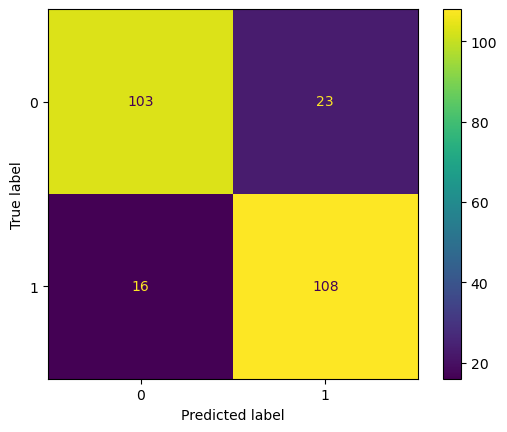

In [23]:
#Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions (y_test, y_pred)
plt.show()

In [24]:
#membuat classification report
from sklearn.metrics import classification_report
print ("Hasil Classification Report: \n", classification_report(y_test, y_pred))

Hasil Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       126
           1       0.82      0.87      0.85       124

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

